Study of Synergistic Effects in Complex Stochastic Systems


In [2]:
import numpy as np
import matplotlib.pyplot as plt

2. Separate Redundancy in a Two-Pole System


In [3]:
def H_up_n(m: int, n: int, p: float) -> float:
    return 1 - (1 - p**m) ** n

In [4]:
def H_down_n(m: int, n: int, p: float) -> float:
    q = 1 - p
    return (1 - q**n) ** m

In [5]:
def n_up_star(
    m: int, delta: float, p: float, n_start: int = 0, n_stop: int = 500
) -> int:
    return min(n for n in range(n_start, n_stop) if H_up_n(m, n, p) >= 1 - delta)

In [6]:
def n_down_star(
    m: int, delta: float, p: float, n_start: int = 0, n_stop: int = 500
) -> int:
    return min(n for n in range(n_start, n_stop) if H_down_n(m, n, p) >= 1 - delta)

Table 1. Meanings of n∗(m, δ), n∗(m, δ) for p = 0,7, δ = 0,1


In [7]:
p = 0.7
delta = 0.1

m_start = 1
m_end = 15

In [8]:
m_list: list[int] = []
n_up_star_list: list[int] = []
n_down_star_list: list[int] = []

for m in range(m_start, m_end + 1):
    m_list.append(m)
    n_up_star_list.append(n_up_star(m, delta, p))
    n_down_star_list.append(n_down_star(m, delta, p))

print("m", *m_list, sep="\t")
print("n_up", *n_up_star_list, sep="\t")
print("n_down", *n_down_star_list, sep="\t")

m	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15
n_up	2	4	6	9	13	19	27	39	56	81	116	166	237	339	484
n_down	2	3	3	4	4	4	4	4	4	4	4	4	5	5	5


Proposition 1.


In [9]:
for m in range(m_start, m_end + 1):
    assert n_up_star(m, delta, p) >= int((1 - delta) / p**m) + 1
    assert n_down_star(m, delta, p) <= int(np.log(delta / m) / np.log(1 - p)) + 1

3. RQ-Queuing Systems with a Large Number of Servers


4. Multiserver Loss Systems


In [10]:
def P_n(ro: float, n: int) -> float:
    res = 0

    for k in range(0, n + 1):
        temp = ro**-k

        for j in range(0, k - 1 + 1):
            temp *= 1 - j / n

        res += temp
    return res**-1

Theorem 5


In [16]:
n_start = 1
n_stop = 500

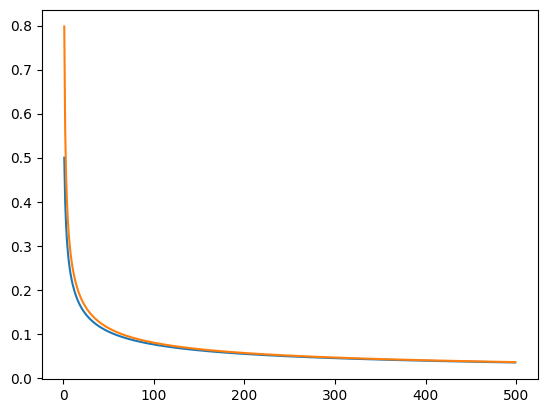

In [17]:
plt.plot(
    [n for n in range(n_start, n_stop)],
    [P_n(1, n) for n in range(n_start, n_stop)],
)
plt.plot(
    [n for n in range(n_start, n_stop)],
    [(2 / (np.pi * n)) ** 0.5 for n in range(n_start, n_stop)],
)

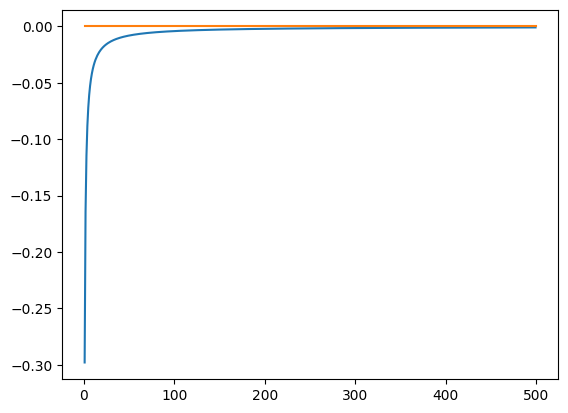

In [18]:
plt.plot(
    [n for n in range(n_start, n_stop)],
    [P_n(1, n) - (2 / (np.pi * n)) ** 0.5 for n in range(n_start, n_stop)],
)
plt.plot(
    [n for n in range(n_start, n_stop)],
    [0 for _ in range(n_start, n_stop)],
)

Remark 2


In [19]:
def A_n(alpha: float, mu: float) -> float:
    if alpha < 1:
        return 0
    elif alpha == 1:
        return 1 / mu
    else:
        return float("inf")

In [20]:
def B_n(alpha: float) -> float:
    if alpha < 1 / 2:
        return 0
    else:
        return float("inf")

5. Parameter Estimation in the Logistics Growth Model
